In [1]:
#imported all the necessary libraries
import requests
import pandas as pd
import numpy as np
import json as js
from bs4 import BeautifulSoup as bs


In [2]:
#using the request library to get the content of the website and parsing it into beautiful soup
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

page = requests.get(url)

soup = bs(page.text, 'html')

In [3]:
#using find_all & indexing to locate the desired table 
table =  soup.find_all('table')[1]

In [4]:
#using find_all to locate the table column titles
world_title = table.find_all('th')

world_title

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [5]:
# looping to get the text component and stripping the irrelevant elements
world_table_titles =[title.text.strip() for title in world_title]

In [6]:
world_table_titles

['Rank',
 'Name',
 'Industry',
 'Revenue (USD millions)',
 'Revenue growth',
 'Employees',
 'Headquarters']

In [7]:
#putting the table_titles in a data frame
df = pd.DataFrame(columns= world_table_titles)

In [8]:
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [9]:
# using the find_all function to get the row data within the table
column_data = table.find_all('tr')

In [10]:
# looping to get the text component and stripping the irrelevant elements
for row in column_data[1:] : 
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    
    length = len(df)
    df.loc[length] = individual_row_data
    
    

In [11]:
#displaying the final dataset for analysis
df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"
...,...,...,...,...,...,...,...
95,96,Best Buy,Retail,"46,298",10.6%,"71,100","Richfield, Minnesota"
96,97,Bristol-Myers Squibb,Pharmaceutical industry,"46,159",0.5%,"34,300","New York City, New York"
97,98,United Airlines,Airline,"44,955",82.5%,"92,795","Chicago, Illinois"
98,99,Thermo Fisher Scientific,Laboratory instruments,"44,915",14.5%,"130,000","Waltham, Massachusetts"


# EXPLORATORY DATA ANALYSIS

In [12]:
# importing the libraries to be used for the EDA
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df.shape

(100, 7)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 6.2+ KB


In [15]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [16]:
#coverting the object data types in the data frame to the appropriate data types
df['Rank'] = df['Rank'].astype('int32')
df['Name'] = df['Name'].astype('str')
df['Industry'] = df['Industry'].astype('str')
df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '').astype('int64')
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '').astype('float')
df['Employees'] = df['Employees'].str.replace(',', '').astype('int64')
df['Headquarters'] = df['Headquarters'].astype('str')

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Rank                    100 non-null    int32  
 1   Name                    100 non-null    object 
 2   Industry                100 non-null    object 
 3   Revenue (USD millions)  100 non-null    int64  
 4   Revenue growth          100 non-null    float64
 5   Employees               100 non-null    int64  
 6   Headquarters            100 non-null    object 
dtypes: float64(1), int32(1), int64(2), object(3)
memory usage: 5.9+ KB


In [18]:
#final dataframe for visualization

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [19]:
#creating a data frame for top 10 companies by revenue and sorting in descending order
df_1 = df[['Name','Revenue (USD millions)']]

df_2 = df_1.sort_values('Revenue (USD millions)', ascending = False)[0:11]

df_2

,Name,Revenue (USD millions)
0,Walmart,611289
1,Amazon,513983
2,Exxon Mobil,413680
3,Apple,394328
4,UnitedHealth Group,324162
5,CVS Health,322467
6,Berkshire Hathaway,302089
7,Alphabet,282836
8,McKesson Corporation,276711
9,Chevron Corporation,246252


Text(0, 0.5, 'Company')

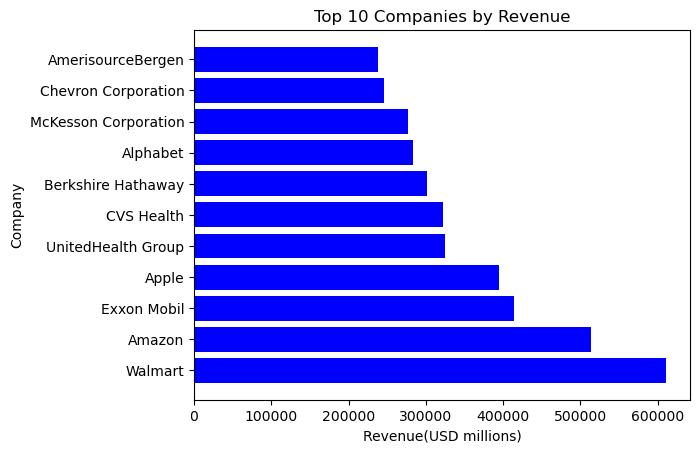

In [20]:
plt.barh(df_2["Name"], df_2["Revenue (USD millions)"], color='blue')
plt.title("Top 10 Companies by Revenue")
plt.xlabel("Revenue(USD millions)")
plt.ylabel("Company")

In [21]:
#companies with the highest revenue growth
Ef_1 = df[['Name','Revenue growth']]

Ef_2= Ef_1.sort_values('Revenue growth', ascending = False )[0:11]

Text(0, 0.5, 'Company')

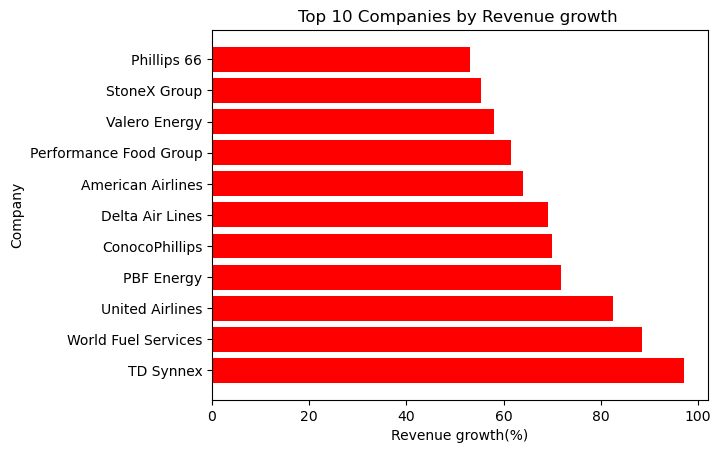

In [22]:

plt.barh(Ef_2["Name"], Ef_2["Revenue growth"] ,color ='red')
plt.title("Top 10 Companies by Revenue growth ")
plt.xlabel("Revenue growth(%)")
plt.ylabel("Company")

In [23]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [24]:
#Companies with the largest workforce
Gf_1 = df[['Name','Employees']]

Gf_2 = Gf_1.sort_values('Employees', ascending = False)[0:11]

Gf_2

,Name,Employees
0,Walmart,2100000
1,Amazon,1540000
51,United States Postal Service,576000
40,FedEx,518249
19,The Home Depot,471600
32,Target Corporation,440000
23,Kroger,430000
36,United Parcel Service,404700
4,UnitedHealth Group,400000
6,Berkshire Hathaway,383000


Text(0, 0.5, 'Company')

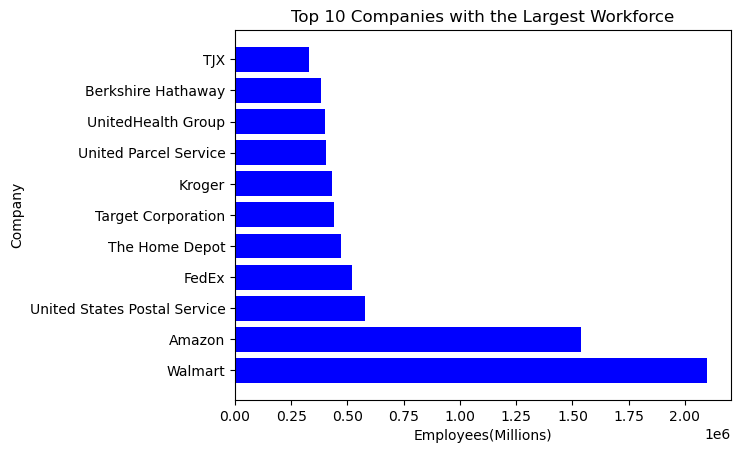

In [25]:
plt.barh(Gf_2["Name"], Gf_2["Employees"], color = 'blue')
plt.title("Top 10 Companies with the Largest Workforce")
plt.xlabel("Employees(Millions)")
plt.ylabel("Company")

In [26]:
#using groupby to get revenue by industries
hf_1= df.groupby(['Industry'],as_index = False)['Revenue (USD millions)'].sum()

hf_1

,Industry,Revenue (USD millions)
0,Aerospace and Defense,65984
1,Aerospace and defense,66608
2,Agriculture cooperative,47194
3,Agriculture manufacturing,52577
4,Airline,144508
5,Apparel,46710
6,Automotive and Energy,81462
7,Automotive industry,314792
8,Beverage,86859
9,Chemical industry,56902


In [27]:
#since there are two instances of 'Aerospace and defence' because of slightly different spellings,the second instance is renamed 
hf_1['Industry'][1] = 'Aerospace and Defense'

C:\Users\hp\AppData\Local\Temp\ipykernel_9272\1574796819.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hf_1['Industry'][1] = 'Aerospace and Defense'


In [28]:
#both instances of 'Aerospace and Defence' now have identical names
hf_1.head()

,Industry,Revenue (USD millions)
0,Aerospace and Defense,65984
1,Aerospace and Defense,66608
2,Agriculture cooperative,47194
3,Agriculture manufacturing,52577
4,Airline,144508


In [29]:
#applying the groupby again
hf_2= hf_1.groupby(['Industry'],as_index = False)['Revenue (USD millions)'].sum()

hf_2.head()

,Industry,Revenue (USD millions)
0,Aerospace and Defense,132592
1,Agriculture cooperative,47194
2,Agriculture manufacturing,52577
3,Airline,144508
4,Apparel,46710


In [30]:
#sorting in ascending order
hf_2 = hf_2.sort_values('Revenue (USD millions)', ascending = False)

hf_2.head(10)

,Industry,Revenue (USD millions)
31,Retail,1578909
28,Petroleum industry,1521225
21,Healthcare,1189368
15,Financials,927262
30,Pharmaceutical industry,730059
34,Technology and Cloud Computing,541636
32,Retail and cloud computing,513983
9,Conglomerate,445718
12,Electronics industry,394328
33,Technology,389147


Text(0, 0.5, 'Industry')

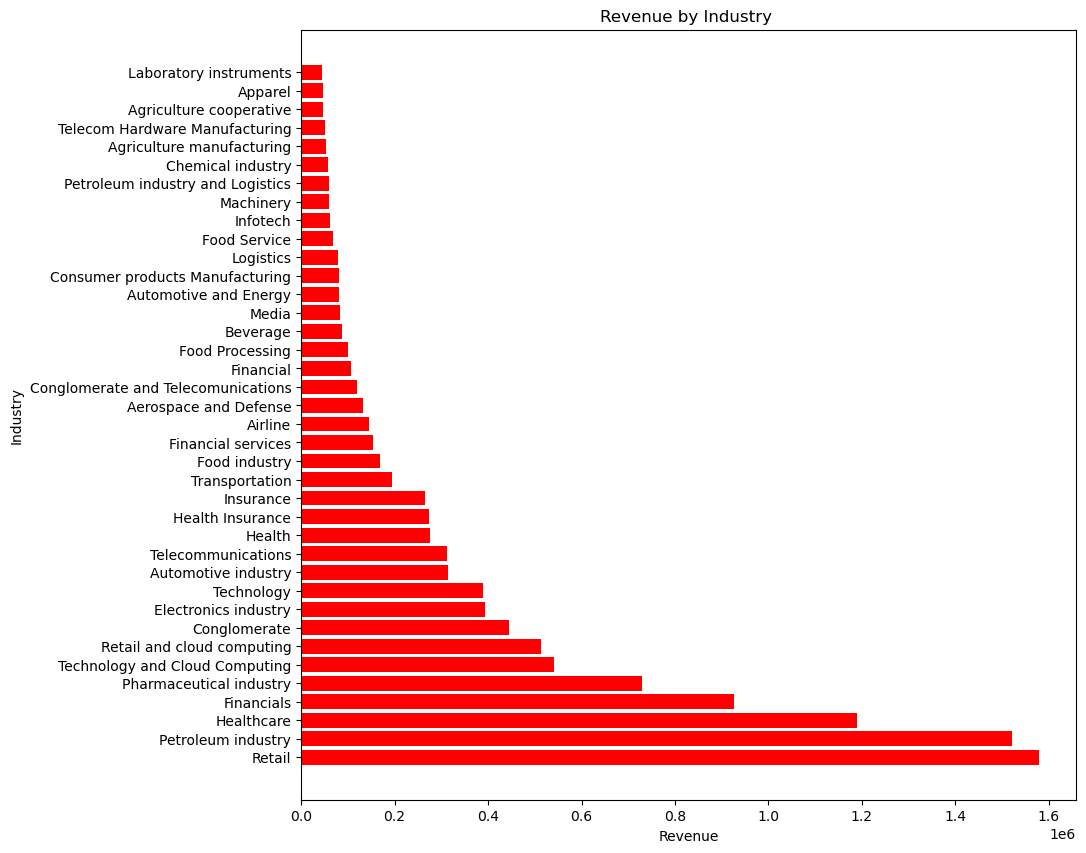

In [31]:
#Plotting graphically & adding chart and axis titles
fig = plt.figure(figsize = (10, 10))
plt.barh(hf_2["Industry"], hf_2["Revenue (USD millions)"] ,color ='red')
plt.title("Revenue by Industry ")
plt.xlabel("Revenue")
plt.ylabel("Industry")

In [32]:
df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,Exxon Mobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


Text(0, 0.5, 'Revenue')

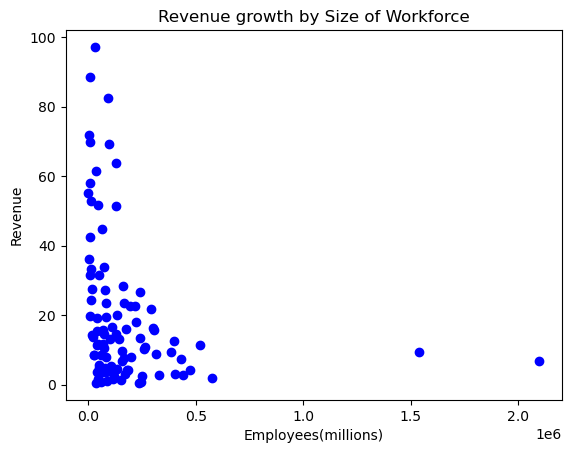

In [33]:
#Using scarterplot to see if there is correlation between revenue growth and number of employees
plt.scatter(df['Employees'], df['Revenue growth'] ,color = 'blue')
plt.title("Revenue growth by Size of Workforce")
plt.xlabel("Employees(millions)")
plt.ylabel("Revenue")

In [34]:
#exporting the dataset to csv
df.to_csv('Largest Companies in USA.csv')